## Project 2: Sentiment Analysis on IMDB dataset
<hr>



### Task 1: Defining the project topic, and RNN models (Deadline: 28.1.2022)

For this project we will use the IMDB Dataset of 50K Movie Reviews which Dataset can be found in the link: https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

I will train a LSTM (Long Short-Term Memory) with the data to elaborate a sentiment Analysis for the classification of emotions (positive and negative) on text data using text analysis techniques.

Afterwards I will compare the results with GRU.

<hr>

### Task 2: Implement the selected model. (Deadline: 11.2.2022)

1. Import all the dependencies

In [1]:
# Import libraries
import keras
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense, Embedding, LSTM
from keras.models import Sequential

import matplotlib.pyplot as plt

2. Defining Key Values:

In [2]:
# Model configuration
max_sequence_length     = 50
num_distinct_words      = 500
embedding_output_dims   = 100
lstm_units              = 128
number_of_epochs        = 10
batch_size              = 256
optimizer               = 'rmsprop'

loss_function           = 'binary_crossentropy'
additional_metrics      = ['accuracy']
validation_split        = 0.20

# Model results
train_accuracies = []
test_accuracies = []
train_losses = []
test_losses = []

3. Loading the data:

* ###### Using the API we download the preprocessed imdb dataset where reviews have been encoded as a sequence of word indexes (integers). Words are indexed by overall frequency in the dataset, which  allows us to quickly filter the most common words.

In [3]:
# Loading data
(Xtrain, ytrain), (Xtest, ytest) = imdb.load_data(num_words=num_distinct_words)
print(len(Xtrain), 'train sequences')
print(len(Xtest), 'test sequences')

25000 train sequences
25000 test sequences


4. Data preprocessing:

* ###### Using the API we download the preprocessed imdb dataset where reviews have been encoded as a sequence of word indexes (integers). Words are indexed by overall frequency in the dataset, which  allows us to quickly filter the most common words.

In [4]:
# Data preprocessing
Xtrain = sequence.pad_sequences(Xtrain, maxlen=max_sequence_length)
Xtest  = sequence.pad_sequences(Xtest, maxlen=max_sequence_length)
print('Input train shape:', Xtrain.shape)
print('Input test shape:', Xtest.shape)
print('Output train shape:', ytrain.shape)
print('Output test shape:', ytest.shape)

Input train shape: (25000, 50)
Input test shape: (25000, 50)
Output train shape: (25000,)
Output test shape: (25000,)


5. Building the model:

* ###### Using the API we download the preprocessed imdb dataset where reviews have been encoded as a sequence of word indexes (integers). Words are indexed by overall frequency in the dataset, which  allows us to quickly filter the most common words.

In [5]:
# Create model
model = Sequential()
model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
model.add(LSTM(lstm_units))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=optimizer, loss=loss_function, metrics=additional_metrics)

# Give a summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           50000     
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 167,377
Trainable params: 167,377
Non-trainable params: 0
_________________________________________________________________


6. Trining the model:

In [6]:
# Fit model
history = model.fit(Xtrain, ytrain, 
                    batch_size=batch_size, 
                    epochs=number_of_epochs, 
                    validation_data=[Xtest, ytest], 
                    validation_split=validation_split)

Epoch 1/10
79/79 [==============================] - 20s 232ms/step - loss: 0.6153 - accuracy: 0.6579 - val_loss: 0.5292 - val_accuracy: 0.7464
Epoch 2/10
79/79 [==============================] - 17s 210ms/step - loss: 0.5121 - accuracy: 0.7498 - val_loss: 0.5691 - val_accuracy: 0.7310
Epoch 3/10
79/79 [==============================] - 17s 209ms/step - loss: 0.4925 - accuracy: 0.7620 - val_loss: 0.5408 - val_accuracy: 0.7272
Epoch 4/10
79/79 [==============================] - 16s 208ms/step - loss: 0.4847 - accuracy: 0.7631 - val_loss: 0.7124 - val_accuracy: 0.7204
Epoch 5/10
79/79 [==============================] - 17s 212ms/step - loss: 0.4749 - accuracy: 0.7724 - val_loss: 0.4977 - val_accuracy: 0.7548
Epoch 6/10
79/79 [==============================] - 17s 213ms/step - loss: 0.4651 - accuracy: 0.7738 - val_loss: 0.4995 - val_accuracy: 0.7444
Epoch 7/10
79/79 [==============================] - 17s 211ms/step - loss: 0.4585 - accuracy: 0.7785 - val_loss: 0.5212 - val_accuracy: 0.7266

7. Evaluating the model

In [8]:
# Evaluate the model
train_loss,train_accuracy = model.evaluate(Xtrain, ytrain, batch_size=batch_size, verbose=0)
test_loss,test_accuracy = model.evaluate(Xtest, ytest, batch_size=batch_size, verbose=0)
print('Training Accuracy: %.3f, Testing Accuracy: %.3f' % (train_accuracy, test_accuracy))
print('Training Loss: %.3f, Testing Loss: %.3f' % (train_loss, test_loss))

train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)
train_losses.append(train_loss)
test_losses.append(test_loss)

Training Accuracy: 0.762, Testing Accuracy: 0.740
Training Loss: 0.471, Testing Loss: 0.511


8. Plotting results

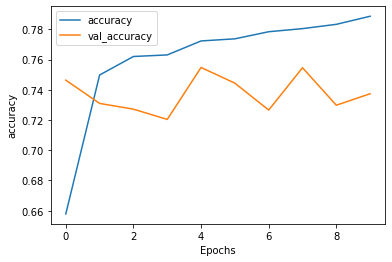

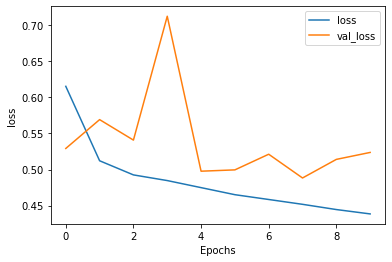

In [9]:
# Plotting results

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

<hr>

### Task 3.A: Tuning the presented model and describing how and why the results get improvement.


In [10]:
from keras.layers import Dropout

# Tuning some parameters to try to avoid the overfiting we have seen in the previous setup
number_of_epochs        = 100      # Increase the number of epochs
batch_size              = 32       # Reduce batch size
optimizer               = 'adam'   # Change the optimizer from rmsprop to adam
max_sequence_length     = 500      # Increase the maximun number of words to consider
num_distinct_words      = 5000     # Increase the number of dictinct words 
embedding_output_dims   = 10       # Reduce the size of the vector space in which words will be embedded
lstm_units              = 64       # Reduce the number of LSTM units

# Loading data
(Xtrain, ytrain), (Xtest, ytest) = imdb.load_data(num_words=num_distinct_words)

# Data preprocessing
Xtrain = sequence.pad_sequences(Xtrain, maxlen=max_sequence_length)
Xtest  = sequence.pad_sequences(Xtest, maxlen=max_sequence_length)

# Create model
model_tuned = Sequential()
model_tuned.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))

# Adding dropout to avoid overfitting in training by bypassing randomly selected neurons, thereby reducing the sensitivity to specific weights of the individual neurons
model_tuned.add(LSTM(lstm_units, dropout=0.2))
model_tuned.add(Dense(1, activation='sigmoid'))

# Define early stopping for early temination that will speed up the process if there is no improvement after 5 consecutive epochs
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

# Compile the model
model_tuned.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Give a summary
model_tuned.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 10)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 64)                19200     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 69,265
Trainable params: 69,265
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
625/625 [==============================] - 101s 161ms/step - loss: 0.1764 - accuracy: 0.9350 - val_loss: 0.3480 - val_accuracy: 0.8650
Epoch 2/100
625/625 [==============================] - 100s 160ms/step - loss: 0.1567 - accuracy: 0.9416 - val_loss: 0.3602 - val_accuracy: 0.8668
Epoch 3/100
625/625 [==============================] - 93s 149ms/step - loss: 0.1498 - accuracy: 0.9442 - val_loss: 0.3927 - val_accuracy: 0.8662
Epoch 4/100
625/625 [==============================] - 93s 149ms/step - loss: 0.1565 - accuracy: 0.9405 - val_loss: 0.3779 - val_accuracy: 0.8662
Epoch 5/100
625/625 [==============================] - 93s 149ms/step - loss: 0.1205 - accuracy: 0.9567 - val_loss: 0.4513 - val_accuracy: 0.8556
Epoch 6/100
625/625 [==============================] - 94s 151ms/step - loss: 0.1207 - accuracy: 0.9549 - val_loss: 0.4287 - val_accuracy: 0.8672
Epoch 6: early stopping
Training Accuracy: 0.957, Testing Accuracy: 0.862
Training Loss: 0.142, Testing Loss: 0.439


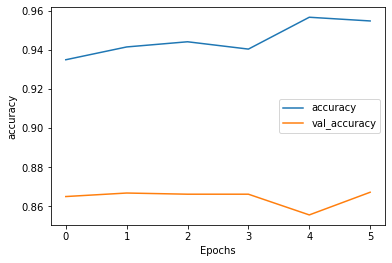

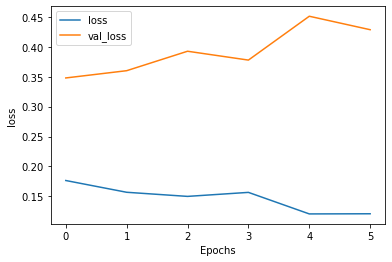

In [12]:
# Fit model
history_tuned = model_tuned.fit(Xtrain, ytrain, 
                    batch_size=batch_size, 
                    epochs=number_of_epochs, 
                    validation_data=[Xtest, ytest], 
                    validation_split=validation_split, 
                    callbacks=[es]
                    )

# Evaluate the model
train_loss,train_accuracy = model_tuned.evaluate(Xtrain, ytrain, batch_size=batch_size, verbose=0)
test_loss,test_accuracy = model_tuned.evaluate(Xtest, ytest, batch_size=batch_size, verbose=0)
print('Training Accuracy: %.3f, Testing Accuracy: %.3f' % (train_accuracy, test_accuracy))
print('Training Loss: %.3f, Testing Loss: %.3f' % (train_loss, test_loss))

train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)
train_losses.append(train_loss)
test_losses.append(test_loss)

# Plot results
plot_graphs(history_tuned, "accuracy")
plot_graphs(history_tuned, "loss")                 

In [16]:
# import pandas as pd
import pandas as pd

df = pd.DataFrame({
    'Model': ['LSTM', 'LSTM_tuned'],
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
    'Train Loss': train_losses,
    'Test Loss': test_losses
    })
    
df.set_index('Model')    
df

,Model,Train Accuracy,Test Accuracy,Train Loss,Test Loss
0,LSTM,0.76196,0.74048,0.471360,0.511047
1,LSTM_tuned,0.95672,0.86248,0.142352,0.439212


As we can see, we have been able to improve our model performance

<hr>

### Task 3.B: Comparing the final model with one other RNN model (GRU). (Deadline: 25.2.2022)

Comparing the obtained results using a GRU model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 10)           50000     
                                                                 
 gru (GRU)                   (None, 64)                14400     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 64,465
Trainable params: 64,465
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
625/625 [==============================] - 125s 198ms/step - loss: 0.5844 - accuracy: 0.6925 - val_loss: 0.5444 - val_accuracy: 0.7200
Epoch 2/100
625/625 [==============

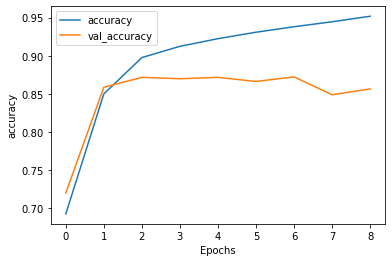

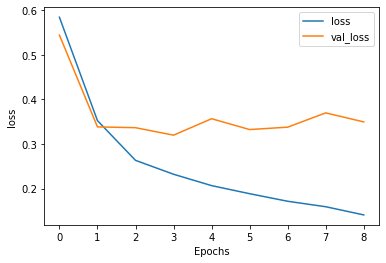

In [17]:
# Setup a GRU - RNN network
from keras.layers.recurrent import GRU

# Create model
gru_model = Sequential()
gru_model.add(Embedding(num_distinct_words, embedding_output_dims, input_length=max_sequence_length))
gru_model.add(GRU(64))
gru_model.add(Dropout(0.2))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.summary()

# Compile the model
gru_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Fit model
history_gru = gru_model.fit(Xtrain, ytrain, 
                    batch_size=batch_size, 
                    epochs=number_of_epochs, 
                    validation_data=[Xtest, ytest], 
                    validation_split=validation_split, 
                    callbacks=[es]
                    )

# Evaluate the model
train_loss,train_accuracy = gru_model.evaluate(Xtrain, ytrain, batch_size=batch_size, verbose=0)
test_loss,test_accuracy = gru_model.evaluate(Xtest, ytest, batch_size=batch_size, verbose=0)
print('Training Accuracy: %.3f, Testing Accuracy: %.3f' % (train_accuracy, test_accuracy))
print('Training Loss: %.3f, Testing Loss: %.3f' % (train_loss, test_loss))

train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)
train_losses.append(train_loss)
test_losses.append(test_loss)

# Plot training history
plot_graphs(history_gru, "accuracy")
plot_graphs(history_gru, "loss")    

<hr>

### Results

In [49]:
df = pd.DataFrame({
    'Model': ['LSTM', 'LSTM_tuned', 'GRU'],
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
    'Train Loss': train_losses,
    'Test Loss': test_losses
    })
    
df.set_index('Model')    
df

,Model,Train Accuracy,Test Accuracy,Train Loss,Test Loss
0,LSTM,0.76196,0.74048,0.471360,0.511047
1,LSTM_tuned,0.95672,0.86248,0.142352,0.439212
2,GRU,0.92680,0.85308,0.201484,0.364004


<hr>

### Conclusions

* With the initial LSTM model we acchieved 76.2% accuracy in the test set after 10 epochs.
* By tuning some hyperparameters we achieved an imporvement up to 86.2% of accuracy in the test set (10% improvement).
* By adding an early stopper we were able to reduce the training time and achieve higher accuracy with just 6 epochs. 
* By adding dropout layer of 0.2 we were abele to reduce the overfitting in training by bypassing randomly selected neurons, thereby reducing the sensitivity to specific weights of the individual neurons.
* We compared our tuned LSTM model with another RNN model (GRU) which perfromed slightly worse than our LSTM tuned model.